## Intro and Model Importation 

We want to use different models for a multiclass classification problem to determine which models perform better in separating the classes, and goo ahead and tune the model which would give us the best initial performance. 

In [4]:
# Impoting general libraries
import warnings
import itertools
import random

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Class Imbalance
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Machine Learning Models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

# Machine Learning Model Evaluation Methods 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

warnings.filterwarnings(action="ignore")
%matplotlib inline

In [5]:
#Import and visualise data columns
data = pd.read_csv("data.csv", index_col=0)
data.head(3)

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,1,-0.175191,0.299030,-0.768587,-5.384094,1.379607,6.886095,-2.223513,2.469312,2.115212,...,0.600137,3.442208,-0.187299,4.658696,0.800293,3.542705,-1.799686,1.905721,4.658696,-0.722506
1,0,1.051032,0.445523,0.289817,-2.734519,0.083652,2.993606,1.000140,-0.754929,-1.549806,...,1.311651,-1.519870,1.219607,-2.688456,0.975750,2.872060,-1.535260,0.064677,-2.688456,0.184203
2,1,2.803331,-1.521435,-0.100668,1.326577,0.273422,1.984409,1.320005,-0.869559,0.383327,...,0.136577,-0.358939,2.457758,0.697211,-0.622162,3.679804,-1.809725,0.156737,0.697211,-1.897684


In [16]:
data.label.value_counts()

2    436
1    434
0    430
Name: label, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   label       1300 non-null   int64  
 1   feature_1   1300 non-null   float64
 2   feature_2   1300 non-null   float64
 3   feature_3   1300 non-null   float64
 4   feature_4   1300 non-null   float64
 5   feature_5   1300 non-null   float64
 6   feature_6   1300 non-null   float64
 7   feature_7   1300 non-null   float64
 8   feature_8   1300 non-null   float64
 9   feature_9   1300 non-null   float64
 10  feature_10  1300 non-null   float64
 11  feature_11  1300 non-null   float64
 12  feature_12  1300 non-null   float64
 13  feature_13  1300 non-null   float64
 14  feature_14  1300 non-null   float64
 15  feature_15  1300 non-null   float64
 16  feature_16  1300 non-null   float64
 17  feature_17  1300 non-null   float64
 18  feature_18  1300 non-null   float64
 19  feature_19  1300 non-null  

In [12]:
data.describe()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,...,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,1.004615,0.538441,0.564395,0.111548,0.562520,0.118493,0.011493,0.685878,-0.665518,0.102386,...,0.099308,-0.053699,0.278267,0.610309,0.100524,-0.168736,0.230796,-0.084270,0.610309,0.137664
std,0.816484,2.730933,2.581858,1.024461,2.841056,1.006478,2.691406,2.518733,2.550913,0.982101,...,0.988319,2.805581,2.680886,2.567479,1.039176,2.909776,2.601933,2.785952,2.567479,1.001677
min,0.000000,-8.805293,-7.058771,-2.981594,-9.791274,-3.127923,-8.706809,-7.070077,-9.049962,-2.911090,...,-2.875839,-10.390801,-8.155762,-9.411871,-3.090801,-12.026419,-7.851654,-9.155803,-9.411871,-3.446479
25%,0.000000,-1.295377,-1.295175,-0.569006,-1.318707,-0.553303,-1.872059,-0.948267,-2.411363,-0.588623,...,-0.553294,-1.767644,-1.515978,-1.027513,-0.606794,-2.094732,-1.459985,-2.002902,-1.027513,-0.525204
50%,1.000000,0.492913,0.598401,0.116058,0.618974,0.108436,0.131648,0.682126,-0.705892,0.131977,...,0.071335,-0.031281,0.297612,0.631999,0.125241,-0.255620,0.240823,-0.025659,0.631999,0.132356
75%,2.000000,2.318563,2.319545,0.795945,2.515789,0.791900,2.003032,2.314486,1.018762,0.773806,...,0.743727,1.692704,2.141628,2.322417,0.795169,1.710145,2.029344,1.811207,2.322417,0.782378
max,2.000000,9.892331,9.027414,3.482049,10.659040,3.686682,8.958129,8.821828,8.944690,3.217624,...,3.312112,10.386582,8.623338,10.160013,3.694073,8.508229,9.562033,10.102895,10.160013,3.200063


#### Insights from Basic Data Analysis:
- No missing values
- All features are continuous variables
- Label is a discrete variable (classification problem)

## EDA

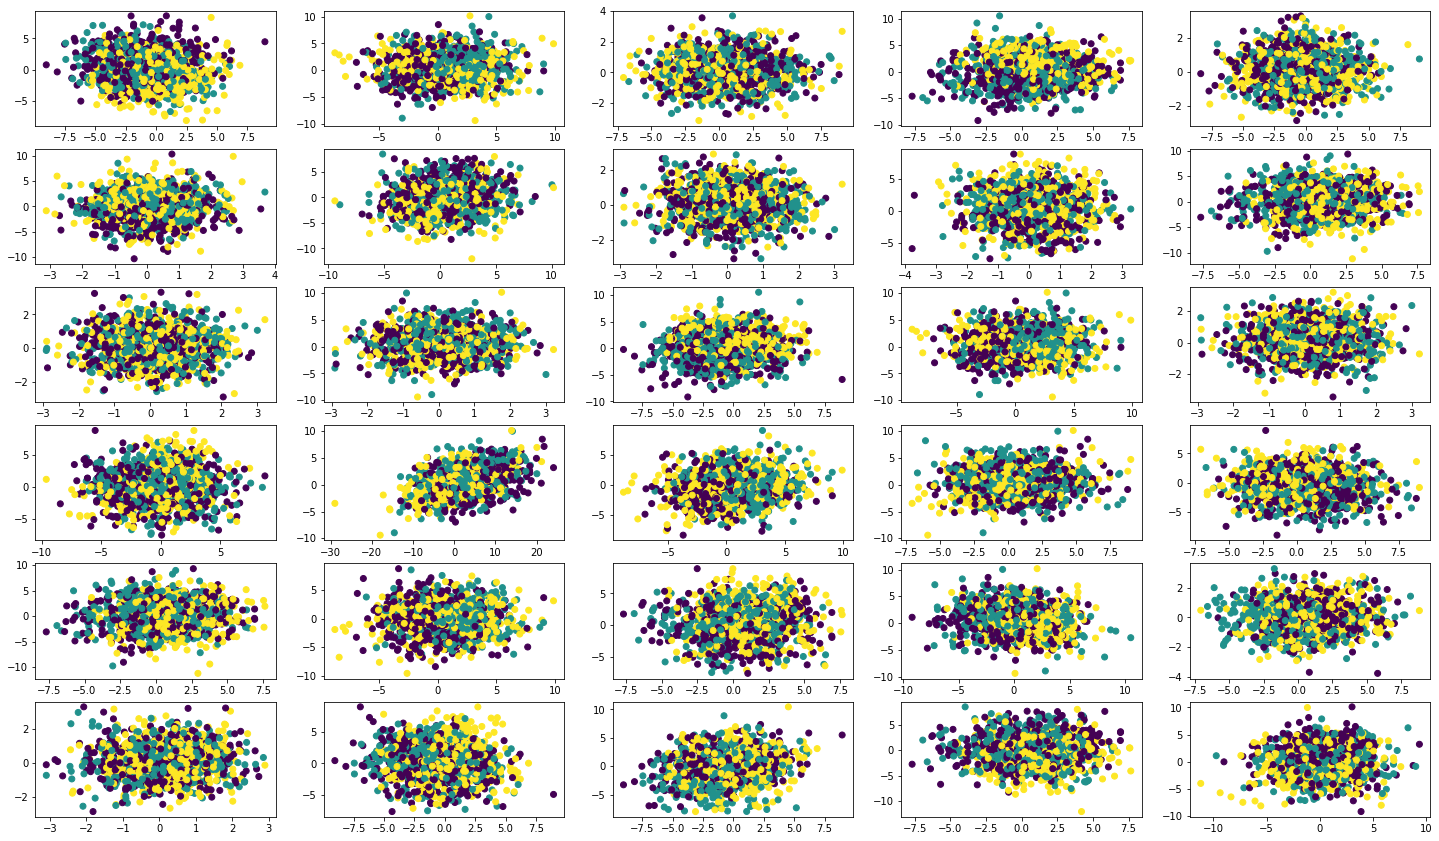

In [15]:
## Check for linear separability 

#Bivariate Data Analysis (Scatter Plots)
comb = list(itertools.combinations([a for a in range(1, len(data.columns))], 2)) #Create combinations of all features, in twos (bivariate)
rand = random.choices(comb, k=30) #Randomly choose 30 bivariate relationships to visualise. Total bivariate relationships (4060 = 30C3) is too much

fig = plt.figure(figsize=(25,25))
for i in range(len(rand)):
    ax = fig.add_subplot(10,5, i+1)
    plt.scatter(data[data.columns[rand[i][0]]],data[data.columns[rand[i][1]]],c=data.label)


### Insights/Deductions 
- SVM - With non-linear kernels such as RBF will work best in these cases. 
- Random Forest will also potentiallly work better in this case. 
- By definition, Logistic Regression will not work best in this case. 

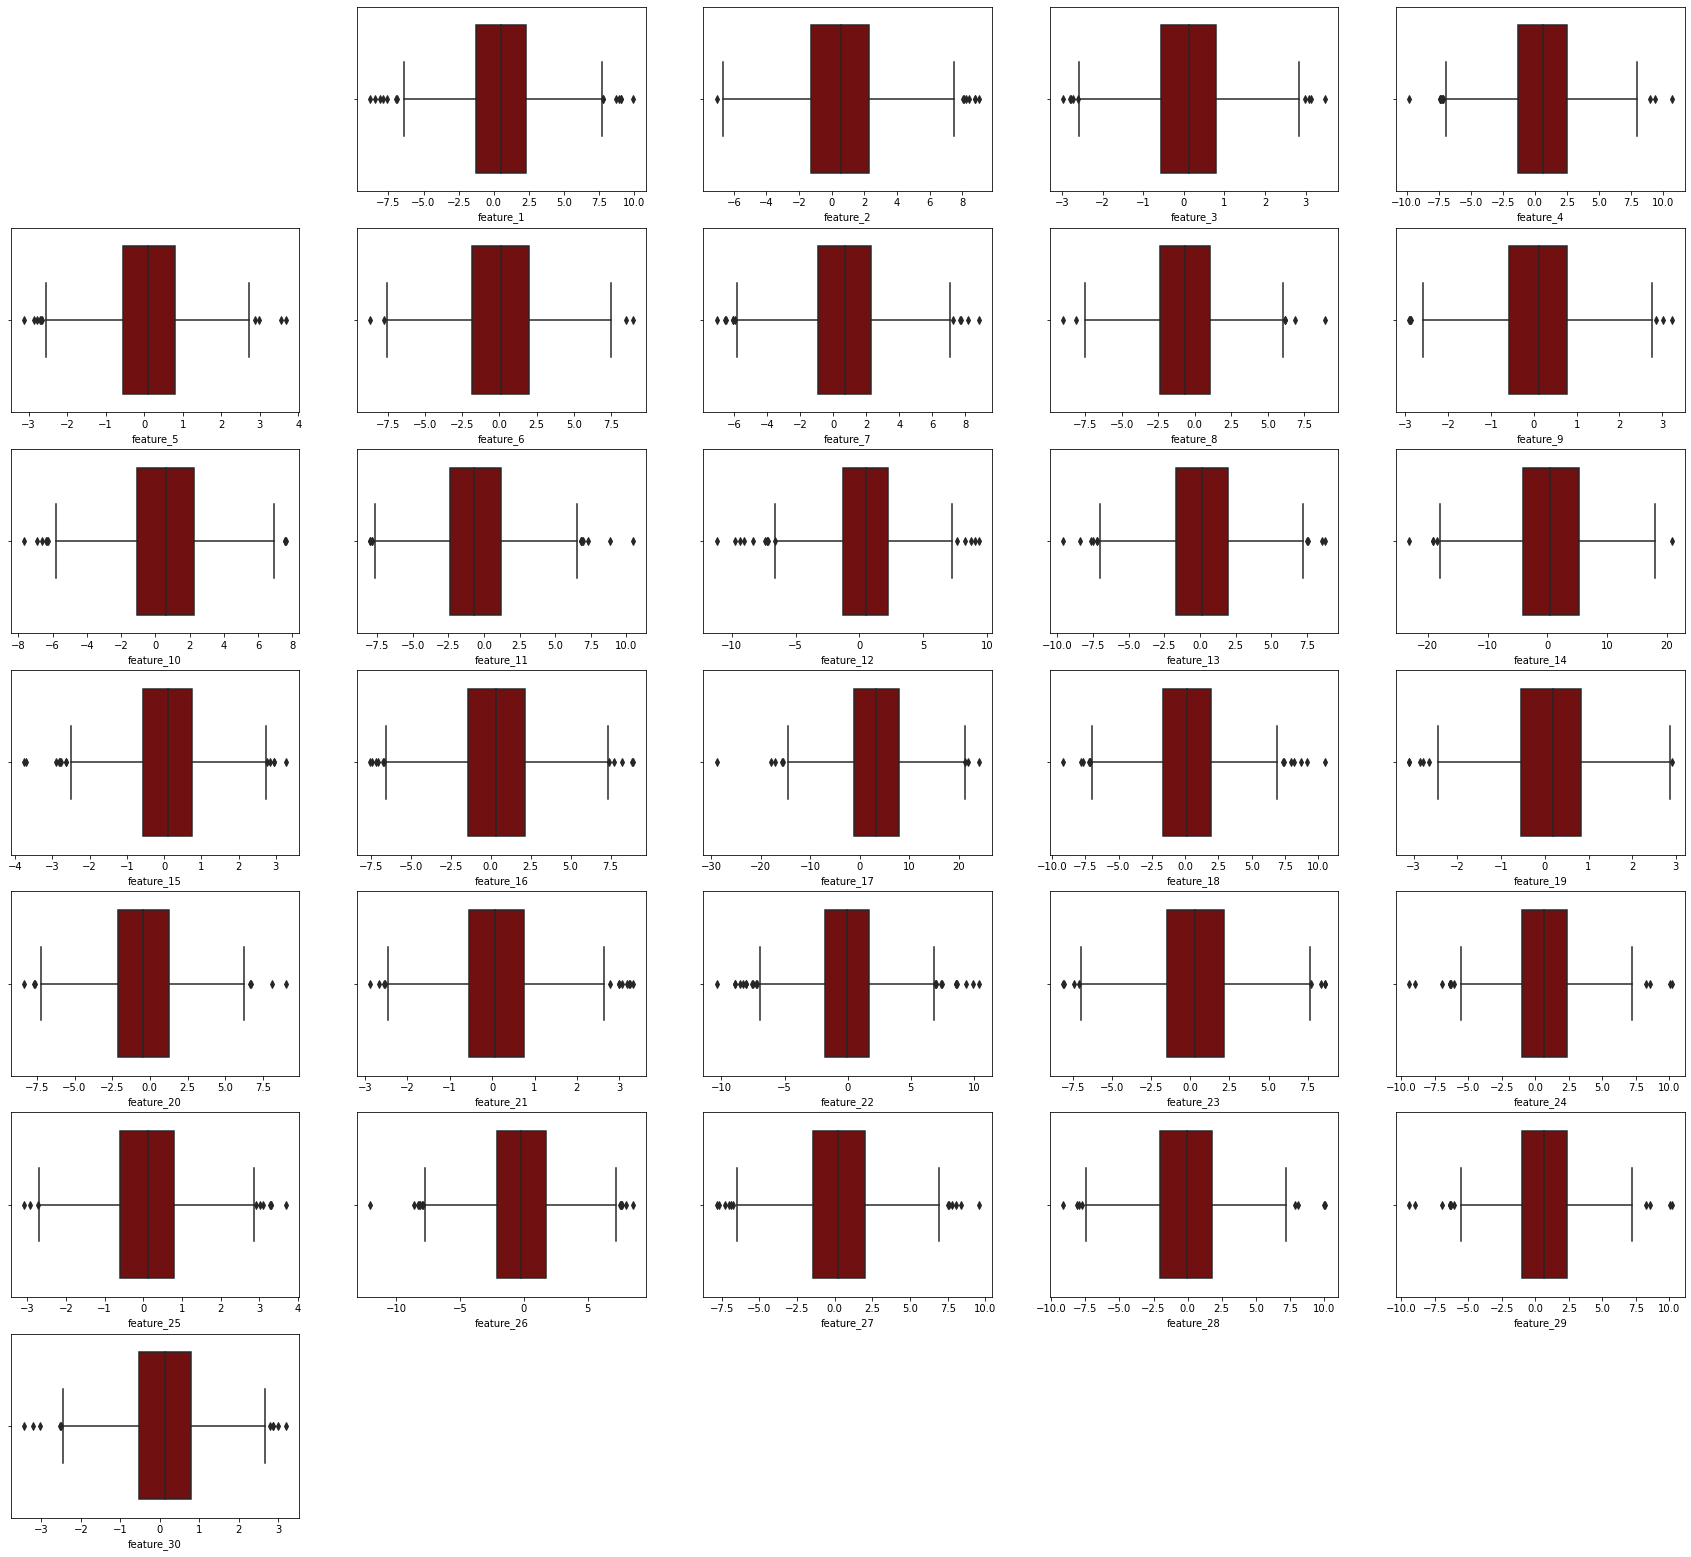

In [24]:
## Check for outliers 
# Unitvariate analysis of all the numerical variables - we are trying to see if there are outliers. 
fig = plt.figure(figsize=(30,40))
for i,j in zip(data.columns,range(len(data.columns))):
    if i!='label': 
        ax = fig.add_subplot(10,5, j+1)
        sns.boxplot(data=data,x=data[i],orient='v',color="Maroon")

### Insights from Exploratory Data Analysis:
1. Most of the numerical variables have outliers 
2. **Inituition:** We will need a model that is to outliers or may need to treat the outliers, before modelling

## Model Data Prep 


In [25]:
X = data.drop('label',axis=1)
y = data['label']


In [28]:
#Train Test Split: Reserve 30% of data for final model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1040, 30) (260, 30) (1040,) (260,)


In [34]:
## Models 

#Logistic Regression (No Regularisation)
pipe = make_pipeline(PolynomialFeatures(degree=3),MinMaxScaler(), LogisticRegression(penalty='none', solver='lbfgs'))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.76923077 0.69711538 0.73076923 0.74038462 0.76442308] 0.7403846153846153


In [84]:
#Logistic Regression (Lasso Regularisation)
pipe = make_pipeline(PolynomialFeatures(degree=3), LogisticRegression(penalty='l2', solver='saga',C=100))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.70192308 0.67307692 0.71153846 0.68269231 0.63942308] 0.6817307692307691


In [81]:
# Support vector classification - RBF Kernel 
pipe = make_pipeline(SVC(kernel='poly',degree=4,C=70))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.74519231 0.72115385 0.74038462 0.6875     0.71153846] 0.7211538461538461


In [85]:
# classification - Random Forest 
pipe = make_pipeline(PolynomialFeatures(degree=2),RandomForestClassifier(n_estimators=500))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.72596154 0.71153846 0.69711538 0.73557692 0.69230769] 0.7125


## Hyperparameter Tuning 

In [ ]:
model = RandomForestClassifier()
# make a dictionary of hyper parameter values to be searched 
search_space ={
    "n_estimators" : [100,200,500],
    'max_depth' : [2,5,10,40],
    'max_features':[5,10,15],
    'criterion':['gini','entropy']
}

# We make a Grid Search CV Object 
GS = GridSearchCV(estimator=model,
                  param_grid=search_space,
                  scoring='f1')
GS.fit(X_train,y_train)
# best esimator 
print(GS.best_estimator_)

In [101]:
GS.best_params_

{'criterion': 'gini', 'max_depth': 2, 'max_features': 5, 'n_estimators': 100}

## Random Search CV 

In [125]:
#Logistic Regression (No Regularisation)
pipe = make_pipeline(PolynomialFeatures(degree=3),MinMaxScaler(), LogisticRegression(C= 1.668088018810296, penalty='l1', solver= 'saga'))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.76923077 0.69711538 0.76442308 0.73076923 0.71153846] 0.7346153846153847


In [130]:
# define the group of parameters to tune 
model = LogisticRegression()
params= dict(C=uniform(loc = 0, scale = 4),
             penalty = ['l1','l2'],
             solver=['saga','lbfgs','liblinear'])

# tuning the parameters 
clf_log = RandomizedSearchCV(model,params,n_iter=10,cv=5,scoring='accuracy',random_state=1)
clf_log.fit(X_train, y_train)
clf_log.best_params_
# clf_log.best_score_

{'C': 0.8178089989260697, 'penalty': 'l1', 'solver': 'saga'}

In [134]:
# Random Forest Hyper Parameter Tuning. 

model = RandomForestClassifier()
n_estimators =[int(x) for x in np.linspace(start=100,stop=1000,num=10)]
max_depth=[int(x) for x in np.linspace(start=1,stop=20,num=5)]
max_features=[int(x) for x in np.linspace(start=5,stop=20,num=5)]

# Parameter Space 1 
search_space ={
    "n_estimators" : n_estimators,
    'max_depth' :max_depth,
    'max_features':max_features,
    'criterion':['gini','entropy']}

# Parameter Space 2 
rfc_search_space = {
    'n_estimators': range(10, 101),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 51),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

clf = RandomizedSearchCV(model,search_space,n_iter=10,cv=5,scoring='accuracy',random_state=1)
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 15, 20],
                                        'max_features': [5, 8, 12, 16, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=1, scoring='accuracy')

In [120]:
clf.best_estimator_
clf.best_score_
clf.best_params_

{'n_estimators': 600, 'max_features': 16, 'max_depth': 20, 'criterion': 'gini'}

In [133]:
### Convert the results to a dataframe to be able to analyze them better 
results = pd.DataFrame(clf_log.cv_results_)[['params','mean_test_score','rank_test_score']]
results.sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
6,"{'C': 0.8178089989260697, 'penalty': 'l1', 'so...",0.578846,1
0,"{'C': 1.668088018810296, 'penalty': 'l1', 'sol...",0.577885,2
4,"{'C': 1.5870698969226797, 'penalty': 'l1', 'so...",0.577885,2
5,"{'C': 1.6767780576131792, 'penalty': 'l1', 'so...",0.577885,2
9,"{'C': 0.5615477543809351, 'penalty': 'l1', 'so...",0.577885,2
3,"{'C': 0.7450408455106836, 'penalty': 'l2', 'so...",0.575962,6
8,"{'C': 1.6692192094685079, 'penalty': 'l2', 'so...",0.575962,6
7,"{'C': 0.10955037279170465, 'penalty': 'l1', 's...",0.573077,8
1,"{'C': 0.00045749926937954655, 'penalty': 'l2',...",0.562500,9
2,"{'C': 0.5870235632684522, 'penalty': 'l1', 'so...",NaN,10


In [135]:
### Convert the results to a dataframe to be able to analyze them better 
results = pd.DataFrame(clf.cv_results_)[['params','mean_test_score','rank_test_score']]
results.sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
4,"{'n_estimators': 1000, 'max_features': 12, 'ma...",0.694231,1
5,"{'n_estimators': 600, 'max_features': 16, 'max...",0.694231,1
8,"{'n_estimators': 1000, 'max_features': 20, 'ma...",0.685577,3
0,"{'n_estimators': 500, 'max_features': 5, 'max_...",0.629808,4
6,"{'n_estimators': 100, 'max_features': 8, 'max_...",0.628846,5
3,"{'n_estimators': 800, 'max_features': 8, 'max_...",0.625000,6
1,"{'n_estimators': 100, 'max_features': 20, 'max...",0.620192,7
9,"{'n_estimators': 100, 'max_features': 20, 'max...",0.609615,8
7,"{'n_estimators': 200, 'max_features': 16, 'max...",0.485577,9
2,"{'n_estimators': 800, 'max_features': 20, 'max...",0.482692,10


In [143]:
# Fit a random forest model with the best params above here.  
pipe = make_pipeline(PolynomialFeatures(degree=2),RandomForestClassifier(n_estimators=600,max_depth=20,max_features=16,criterion='entropy'))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.74038462 0.73557692 0.70673077 0.79326923 0.71153846] 0.7375


In [139]:
results.to_csv('resutls.csv')